Table of Contents

1. Section 1: Introduction
   * Section 1.1 Outline
1. Section 2: Task 1- Data Strategy
   * Section 2.1: ITV want to know there customer viewing habit    
2. Section 3: Task 2- Data Science
   * Section 3.1: ITV wana know whome they should promote 'A Spy among the Friends'

# Section 1: Introduction

This notebook presents and will analysis the Data set to get the viewing pattern of the ITV Customers from this input data will build Machine learningh models that help the marketing team to identify the correct customers who will watch the show "A Spy among friends'.

# Section 1.1: Outline
**Section 2** Loads the data for Data Strategy and derives variables to know the customers viewing habits.

**Section 3** Loads the data for Data Scienec task and build 03 Machine learning model and predict whome the marketing team should give suggestion to wtach "A spy among friends"

# Section 2: Task 1 - Data Strategy

### Section 2.1 : ITV want to know what the customer base viewing habits look like?

In [1]:
# importing library
! pip install xlrd
! pip install openpyxl
! pip install matplotlib
! pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# imporating data as Dataframe
data_strategy= pd.read_excel("DIG_Step_Up_Viewing_Data_Strategy.xlsx")

In [3]:
# Keeping required columns in the Dataframe
data_strategy=data_strategy[['platform',
                             'session_duration_seconds',
                             'is_weekend','stream_type',
                             'genre','sub_genres',
                             'schedule_channel',
                             'watched_flag']]

In [4]:
data_strategy.head()

,platform,session_duration_seconds,is_weekend,stream_type,genre,sub_genres,schedule_channel,watched_flag
0,TV,0,False,vod,DRAMA,LONG RUNNING DRAMA,ITV,1
1,TV,1389,False,vod,DRAMA,LONG RUNNING DRAMA,ITV,1
2,TV,4455,False,vod,DRAMA,"CRIME AND THRILLER,PERIOD AND HISTORICAL",ITV4,1
3,TV,840,False,vod,DRAMA,LONG RUNNING DRAMA,ITV,1
4,TV,1916,False,vod,ENTERTAINMENT,QUIZ AND GAME SHOWS,ITV,1


In [5]:
#Grouping data on features to know there viewing habit 
grouped=data_strategy.groupby(['genre','session_duration_seconds','platform'])
grouped

In [6]:
# Calculating mean of "A spy among friend" (watched_flag column) for each of the group feature
viewing_habit=grouped['watched_flag'].mean()
viewing_habit

genre   session_duration_seconds  platform
COMEDY  0                         Desktop     0.076923
                                  Mobile      0.000000
                                  TV          0.838235
        1                         TV          0.571429
        2                         TV          1.000000
                                                ...   
SPORT   43171                     Desktop     0.000000
        43179                     TV          0.000000
        53479                     TV          1.000000
        53938                     TV          1.000000
        81251                     TV          1.000000
Name: watched_flag, Length: 17564, dtype: float64

* By grouping the data in this way, you can compare the customer viewing habits based on the different features and see how they are related to each other. 
* For example, we can see if customers who belong to a certain "Customer genre" tend to watch the series more often, or if customers who watch at a certain "Time of watch" are more likely to have watched the series.
* If the mean of the "watched_flag" column for a group of customers who belong to a certain "Customer genre", watch on a specific "Platform of watch", and at a certain "Time of watch" is 0.8, it means that 80% of the customers in that group watched the series "A spy among friends".

In [7]:
#Calculating the Percentage of viewers watched the A Spy among Friend
def customer_viewing_habits(data_strategy):
    total_customers = len(data_strategy)
    spy_watches = data_strategy[data_strategy['watched_flag'] == 1].shape[0]
    spy_watch_percentage = (spy_watches / total_customers) * 100
    return spy_watch_percentage

In [8]:
viewers = customer_viewing_habits(data_strategy)
print('Number of viewers who watched \'A spy among friend\' :',f'{viewers:.3f}','%')

Number of viewers who watched 'A spy among friend' : 78.402 %


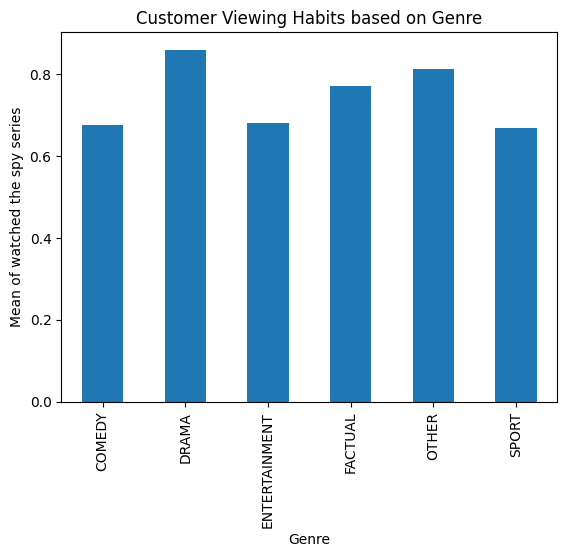

In [9]:
# Plotting a bar graph to know the Genres of the viewers who watched the series
grouped_data = data_strategy.groupby('genre')['watched_flag'].mean()
grouped_data.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Mean of watched the spy series')
plt.title('Customer Viewing Habits based on Genre')
plt.show()

* Plotting the data by genre can give us an idea of the customer viewing habits in terms of their preferred genre. 
* The generated bar plot shows the mean age of customers who watched and did not watch the spy series for each genre. 
* This can help you determine if certain genres have a higher viewership for the spy series, and therefore, you may consider targeting those genres for future promotions or advertising. 
* From the Bar Graph we can say that people who watch Drama, Factual and others types of Genre are the target customer for the ITV Marketing team.  
* Additionally, we can also compare the mean age of customers for each genre, which can give you an idea of the age demographic that is more likely to watch the spy series. 
* This information can be useful in tailoring your marketing efforts to target the right audience.

# Section 3: Task 2-Data Science

### Section 3.2 : Who should ITV be promoting the show 'A Spy among the Friends'

In [10]:
# Load the data into a pandas DataFrame
df=pd.read_csv('DIG_step_up_user_data.csv')
df=df[['age','top_3_programmes','top_3_genres','top_3_subgenres','any_spy_among_friends_consumption']]
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                1658 non-null   float64
 1   top_3_programmes                   1771 non-null   object 
 2   top_3_genres                       1745 non-null   object 
 3   top_3_subgenres                    1771 non-null   object 
 4   any_spy_among_friends_consumption  1771 non-null   bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 57.2+ KB


(1771, 5)

In [11]:
#Cleaning the data and redcing noise
df.isnull().sum()

age                                  113
top_3_programmes                       0
top_3_genres                          26
top_3_subgenres                        0
any_spy_among_friends_consumption      0
dtype: int64

In [12]:
df.dropna(inplace=True)
df.shape
df.head()

,age,top_3_programmes,top_3_genres,top_3_subgenres,any_spy_among_friends_consumption
0,30.0,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']","['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",True
1,33.0,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",True
2,33.0,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']","['FOOTBALL', 'EVENT', 'CELEBRITY']",True
3,36.0,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']","['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",True
4,32.0,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']","['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",True


In [13]:
df.duplicated().sum()

127

In [14]:
df.drop_duplicates(inplace=True)
df.head()

,age,top_3_programmes,top_3_genres,top_3_subgenres,any_spy_among_friends_consumption
0,30.0,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']","['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",True
1,33.0,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",True
2,33.0,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']","['FOOTBALL', 'EVENT', 'CELEBRITY']",True
3,36.0,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']","['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",True
4,32.0,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']","['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",True


In [15]:
! pip install -U scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [16]:
# Input will use to check our model
df.iloc[22]

age                                                                               28.0
top_3_programmes                                   ['LOADED IN PARADISE', 'JOHN WICK']
top_3_genres                                                      ['FACTUAL', 'OTHER']
top_3_subgenres                      ['ENTERTAINMENT', 'ACTION AND ADVENTURE', 'THR...
any_spy_among_friends_consumption                                                False
Name: 22, dtype: object

### Model 1: Random Forest Classifier with age and top_3_genres as the features

In [17]:
# Prepare the features and target
X = df[['age', 'top_3_genres']]
y = df['any_spy_among_friends_consumption']

In [18]:
# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['top_3_genres'])

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train the logistic regression model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict on the test set
y_pred = model1.predict(X_test)

In [22]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier is:", accuracy)

Accuracy of Random Forest Classifier is: 0.7142857142857143


In [23]:
#Evaluating f1 Score
f1=f1_score(y_test,y_pred)
f1

0.7440476190476191

In [24]:
#Checking the model
X_predict1=X
y_pred1=model1.predict(X_predict1)[22]
print("Random Classifier Model prediction:", y_pred1)

Random Classifier Model prediction: False


### Model 2: Decision Tree with top_3_subgenres and top_3_programmes as the features

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
# Prepare the features and target
X2 = df[['top_3_genres', 'top_3_programmes']]
y2 = df['any_spy_among_friends_consumption']

In [27]:
# One-hot encode the categorical features
X2 = pd.get_dummies(X2)

In [28]:
# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [29]:
# Train the logistic regression model
model2 = DecisionTreeClassifier()
model2.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [30]:
# Predict on the test set
y2_pred = model2.predict(X2_test)

In [31]:
# Evaluate the accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.770764119601329


In [32]:
#Evaluating f1 Score
f1=f1_score(y2_test,y2_pred)
f1

0.8109589041095889

In [33]:
# Checking the Model
X2_predict=X2
y2_pred=model2.predict(X2_predict)[22]
print("Decision Tree Model prediction is:", y2_pred)

Decision Tree Model prediction is: False


### Model 3: Logistic Regression with age,top_3_genres,top_3_subgenres and top_3_programmes as the features

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# Prepare the features and target
X3 = df[['age', 'top_3_genres', 'top_3_subgenres', 'top_3_programmes']]
y3 = df['any_spy_among_friends_consumption']

In [36]:
# One-hot encode the categorical features
X3 = pd.get_dummies(X3)

In [37]:
# Split the data into training and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [38]:
# Train the logistic regression model
model3 = LogisticRegression()
model3.fit(X3_train, y3_train)

LogisticRegression()

In [39]:
# Predict on the test set
y3_pred = model3.predict(X3_test)

In [40]:
# Evaluate the accuracy
accuracy = accuracy_score(y3_test, y3_pred)
print('Accuracy for Logistic Regression Model is: ', accuracy)

Accuracy for Logistic Regression Model is:  0.7840531561461794


In [41]:
#Evaluating f1 Score
f1=f1_score(y3_test,y3_pred)
f1

0.8158640226628896

In [42]:
# Checking the Model
X3_predict=X3
y3_pred=model3.predict(X3_predict)[22]
print("Logistic Regression Model prediction:", y3_pred)

Logistic Regression Model prediction: False


**1) Out of the three models, which one performed the best and why?**
* Answer

- To determine which model performed the best, we would need to compare the performance metrics, that is accuracy and F1 Score of each of the models on the same test data. 
- The model with the highest performance metrics would be considered the best performer and after comparing its clear that Decison Tree (Model 2) and Linear Regression(Model 3) with accuracy of 77.4% and 78.4, F1 as 81.31% and 81.56% respectively are he best.
- Have checked multiple input for Model 1 where it reverted incorrect output in many cases whereas Model 2 and 3 prediction were correct in most of the time.


**2) Which features played the most significant role in determining the outcome?**
* Answer

- Based on the results from Model 2 and Model 3 that take features top_3_genres and top_3_programs seem to play the most significant role in determining the outcome as they are included in both model 2 and 3, which had the highest accuracy and F1 scores.

**3. Are there any additional data points that could be collected to enhance the model's performance?**
* Answer

- To enhance the model's performance, additional data points that could be collected include: 
1) Customer interaction: Information on how the viewer is interacting with the series such as sharing with friends can provide valuable insights into the customer engagemnet and interest in the series. 
2) Customer Demographic Information: This could include information such as income, education level, and location. This information can provide insights into customer preferences and habits, which could help improve the accuracy of the model.
3) Customer ratings and feedback on the series: Collecting customer rating and feedback will help to model what aspect of models are appeling and which are not appeling to the viewing and give suggestion accordingly.
4) Device Information : Information onthe type of device the customer uses to watch the series such as Laptop, Televison, Laptop can give insights of the viewing habits of the customers.
5) Activity of Social Media: Data collected from the Social Media activity such as posts and mentioend realted to the series help the model to understand the level and engagemnet and intrets level of the viewer.

**4. Can you explain, in your own words, how each of these models work and their underlying mechanisms? Remember to do some research first to deepen your understanding.**

- Answer

- _Random Forest_:

A Random Forest is an ensemble machine learning model that combines the predictions of multiple decision trees. The model generates multiple decision trees, each trained on a random subset of the data, and the final prediction is made by combining the predictions of all the trees. The trees are uncorrelated with each other, so their predictions are less likely to be influenced by outliers or noise in the data. This results in a more robust and accurate prediction compared to a single decision tree.

For example, in Model 1 where the features were age and top 3 genres, the random forest algorithm would use these features to generate multiple decision trees. Each tree would make a prediction based on the customer's age and the genres they prefer to watch. The final prediction of whether or not the customer would watch the series "A Spy Among Friends" would be the average prediction of all the trees.

- _Decision Tree_:

A Decision Tree is a tree-like model that starts with a single node (root) and splits the data into smaller subsets (leaves) based on the feature that best separates the target class. The idea is to split the data in a way that minimizes the impurity of the classes in each subset. The process continues recursively until a stopping criterion is met. The final prediction is made by following the path from the root to the leaf that represents the sample.

For example, in Model 2 where the features were top 3 genres and top 3 programs, the decision tree algorithm would start with a root node that would split the data based on the top 3 genres. For example, if a customer liked Action and Adventure genres, the algorithm would follow the path to the next node that represents these genres. The process would continue until a final prediction of whether or not the customer would watch the series "A Spy Among Friends" is made.

- _Logistic Regression_:

Logistic Regression is a linear model that is used to predict a binary outcome (e.g., yes/no, true/false) based on a set of predictor variables. The algorithm estimates the probability of the target class (e.g., watching the series) given the predictor variables and maps the probability to a binary prediction. The idea is to find the line that best separates the target class based on the predictor variables.

For example, in Model 3 where the features were age, top 3 genres, top 3 sub-genres, and top 3 programs, the logistic regression algorithm would estimate the probability of the customer watching the series "A Spy Among Friends" based on their age, preferred genres, sub-genres, and programs. The algorithm would then map the probability to a binary prediction of either watching or not watching the series.

- In conclusion, these three models have different underlying mechanisms, but they all aim to make predictions based on the customer's data. The Random Forest combines the predictions of multiple decision trees to make a more robust prediction, the Decision Tree splits the data based on the feature that best separates the target class, and Logistic Regression estimates the probability of the target class based on a set of predictor variables.